In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].apply(lambda x: iris.target_names[x])

print("Dataset Information:")
print(f"Number of samples: {iris_df.shape[0]}")
print(f"Number of features: {iris_df.shape[1] - 2}")  # Excluding target and species columns
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print("\nFirst 5 rows of the dataset:")
print(iris_df.head())

Dataset Information:
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


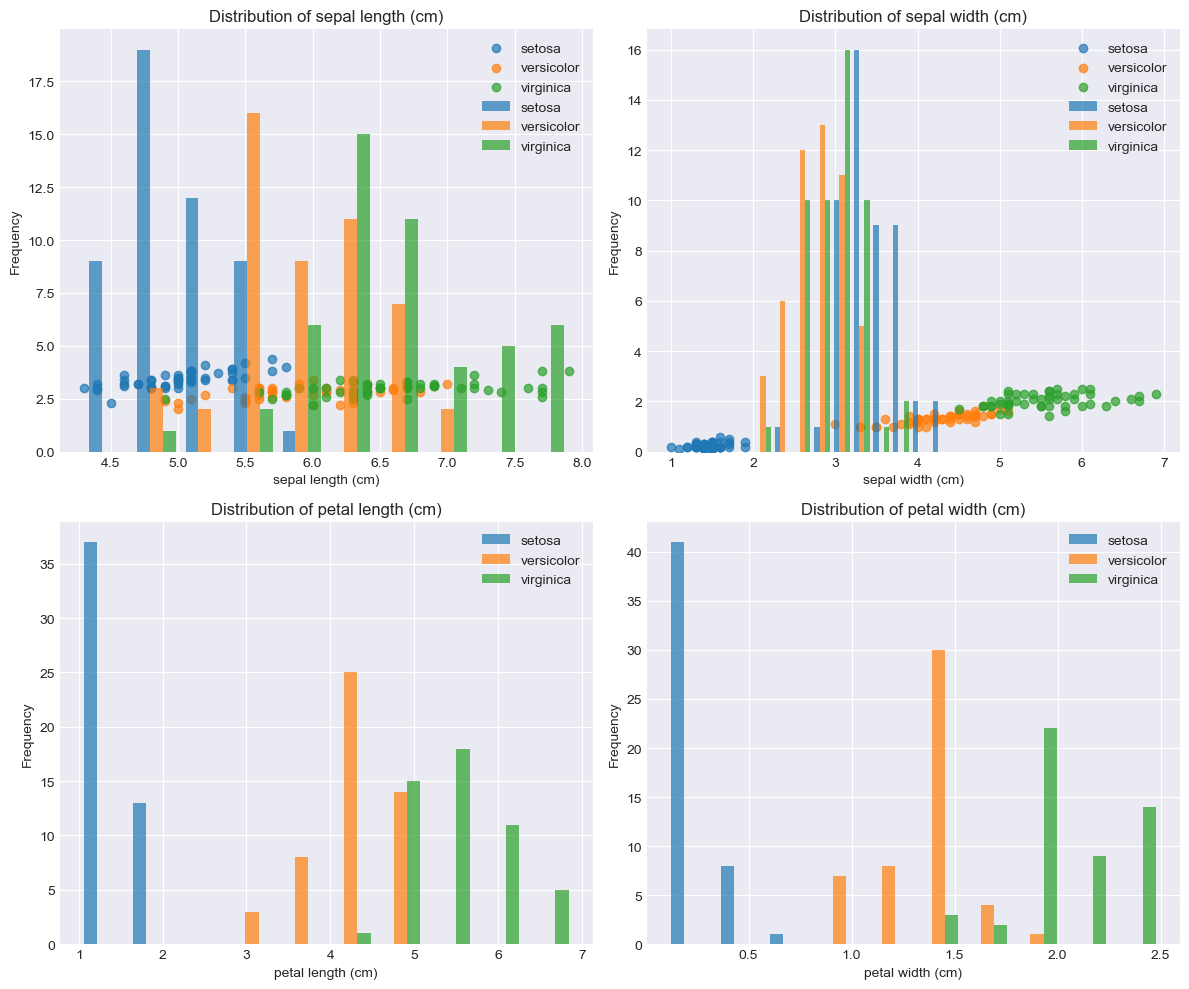

In [10]:
# Visualization function to understand the data distribution
def visualize_iris_data(df):
    """
    Visualize the Iris dataset with pair plots
    
    Parameters:
    df: pandas DataFrame containing the iris data
    """
    # Set the style for better visualization
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot sepal length vs sepal width
    for species in df['species'].unique():
        species_data = df[df['species'] == species]
        axes[0, 0].scatter(species_data['sepal length (cm)'], 
                          species_data['sepal width (cm)'], 
                          label=species, alpha=0.7)
    axes[0, 0].set_xlabel('Sepal Length (cm)')
    axes[0, 0].set_ylabel('Sepal Width (cm)')
    axes[0, 0].set_title('Sepal Length vs Sepal Width')
    axes[0, 0].legend()
    
    # Plot petal length vs petal width
    for species in df['species'].unique():
        species_data = df[df['species'] == species]
        axes[0, 1].scatter(species_data['petal length (cm)'], 
                          species_data['petal width (cm)'], 
                          label=species, alpha=0.7)
    axes[0, 1].set_xlabel('Petal Length (cm)')
    axes[0, 1].set_ylabel('Petal Width (cm)')
    axes[0, 1].set_title('Petal Length vs Petal Width')
    axes[0, 1].legend()
    
    # Plot histograms of features
    features = ['sepal length (cm)', 'sepal width (cm)', 
                'petal length (cm)', 'petal width (cm)']
    
    for i, feature in enumerate(features):
        row, col = divmod(i, 2)
        axes[row, col].hist([df[df['species'] == species][feature] 
                           for species in df['species'].unique()],
                          label=df['species'].unique(), alpha=0.7)
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].set_title(f'Distribution of {feature}')
        axes[row, col].legend()
    
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_iris_data(iris_df)


KERNEL MATRIX DEMONSTRATION
Sample data shape: (5, 2)
Sample data:
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

Linear Kernel Matrix (5x5):
[[38.26 35.49 35.17 34.31 38.1 ]
 [35.49 33.01 32.63 31.84 35.3 ]
 [35.17 32.63 32.33 31.54 35.02]
 [34.31 31.84 31.54 30.77 34.16]
 [38.1  35.3  35.02 34.16 37.96]]

RBF Kernel Matrix (5x5, gamma=0.5):
[[1.         0.86502229 0.8824969  0.81464732 0.99004983]
 [0.86502229 1.         0.96078944 0.95122942 0.83110428]
 [0.8824969  0.96078944 1.         0.99004983 0.8824969 ]
 [0.81464732 0.95122942 0.99004983 1.         0.81464732]
 [0.99004983 0.83110428 0.8824969  0.81464732 1.        ]]


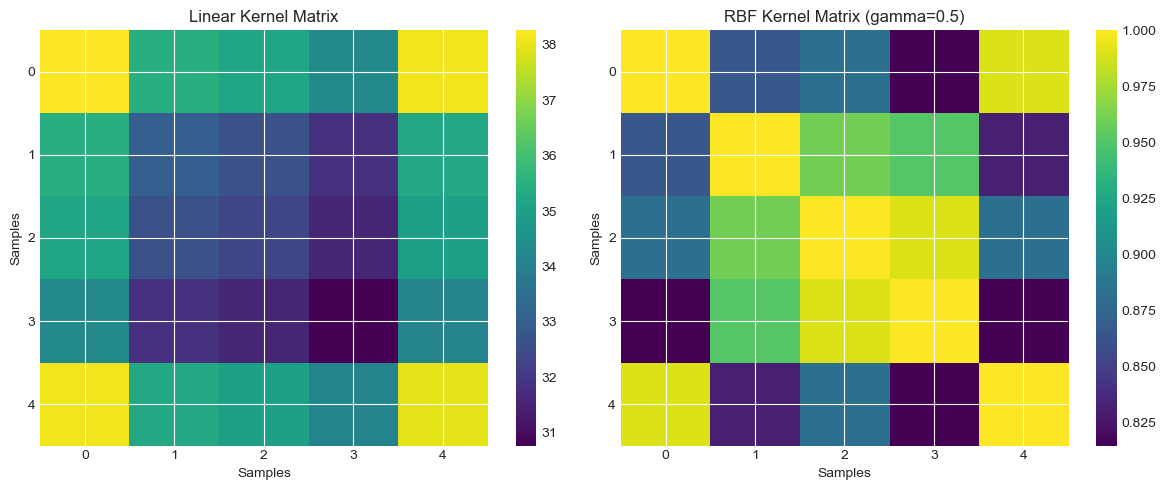

In [11]:
# Example of a custom kernel function
def custom_rbf_kernel(gamma=1.0):
    """
    Create a custom RBF kernel function
    
    Parameters:
    gamma: Kernel coefficient for RBF
    
    Returns:
    Custom kernel function
    """
    def rbf_kernel(X, Y):
        """
        Custom RBF kernel implementation
        """
        X_norm = np.sum(X**2, axis=1).reshape(-1, 1)
        Y_norm = np.sum(Y**2, axis=1)
        
        # Compute the squared Euclidean distance matrix
        squared_dist = X_norm + Y_norm - 2 * np.dot(X, Y.T)
        
        # Apply RBF kernel
        K = np.exp(-gamma * squared_dist)
        
        return K
    
    return rbf_kernel

# Demonstration of kernel matrix calculation
def demonstrate_kernel_matrices():
    """
    Demonstrate different kernel matrices
    """
    print("\n" + "=" * 70)
    print("KERNEL MATRIX DEMONSTRATION")
    print("=" * 70)
    
    # Take a small subset of data
    X_small = iris.data[:5, :2]  # First 5 samples, first 2 features
    print(f"Sample data shape: {X_small.shape}")
    print(f"Sample data:\n{X_small}")
    
    # Linear kernel
    linear_kernel = np.dot(X_small, X_small.T)
    print(f"\nLinear Kernel Matrix (5x5):\n{linear_kernel}")
    
    # RBF kernel (using custom implementation)
    rbf_kernel_func = custom_rbf_kernel(gamma=0.5)
    rbf_kernel_matrix = rbf_kernel_func(X_small, X_small)
    print(f"\nRBF Kernel Matrix (5x5, gamma=0.5):\n{rbf_kernel_matrix}")
    
    # Visualize kernel matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Linear kernel heatmap
    im1 = axes[0].imshow(linear_kernel, cmap='viridis', aspect='auto')
    axes[0].set_title('Linear Kernel Matrix')
    axes[0].set_xlabel('Samples')
    axes[0].set_ylabel('Samples')
    plt.colorbar(im1, ax=axes[0])
    
    # RBF kernel heatmap
    im2 = axes[1].imshow(rbf_kernel_matrix, cmap='viridis', aspect='auto')
    axes[1].set_title('RBF Kernel Matrix (gamma=0.5)')
    axes[1].set_xlabel('Samples')
    axes[1].set_ylabel('Samples')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

# Run kernel demonstration
demonstrate_kernel_matrices()

SUPPORT VECTOR MACHINES (SVM) DEMONSTRATION
Dataset: Iris Flower Classification
Training set size: 105 samples
Test set size: 45 samples

Training SVM models with different kernels:
--------------------------------------------------

Training LINEAR kernel SVM...
  Accuracy: 0.9111
  Number of support vectors: 21

Training POLY kernel SVM...
  Accuracy: 0.8667
  Number of support vectors: 39

Training RBF kernel SVM...
  Accuracy: 0.9333
  Number of support vectors: 40

Training SIGMOID kernel SVM...
  Accuracy: 0.9111
  Number of support vectors: 42


Hyperparameter Tuning for RBF Kernel:
--------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.9810
Test set accuracy: 0.9111


Model Comparison:
--------------------------------------------------
    Model  Accuracy
      rbf  0.933333
   linear  0.911111
  sigmoid  0.911111
tuned_rbf  0.911111
     poly  0.866

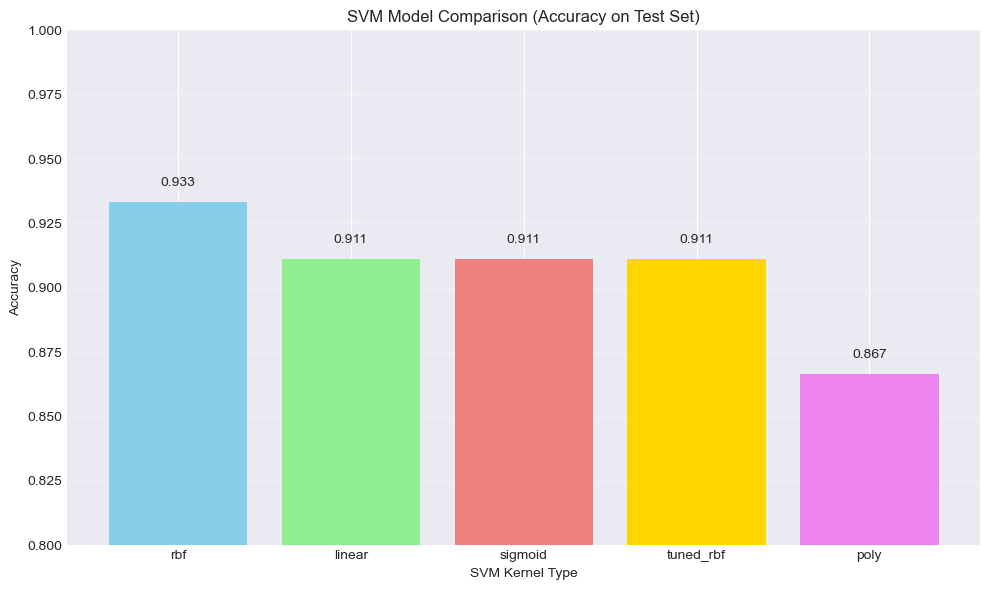


Detailed Classification Report for TUNED_RBF Kernel:
------------------------------------------------------------


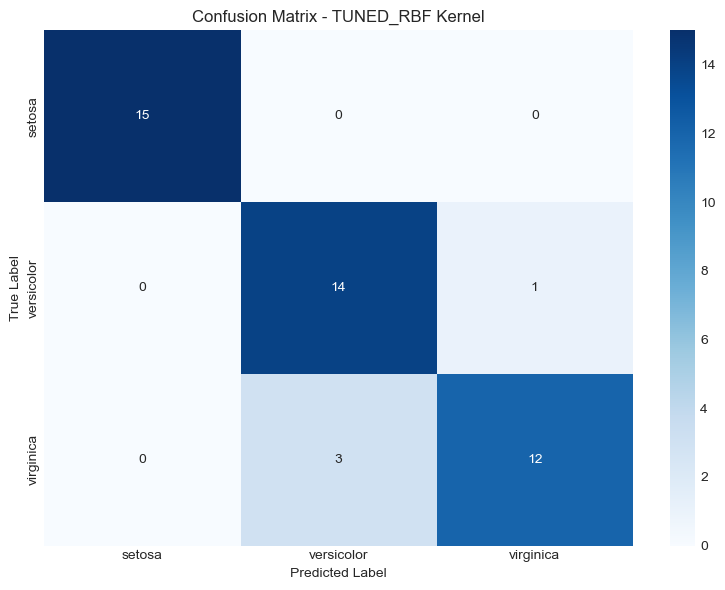


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


2D DECISION BOUNDARY VISUALIZATION


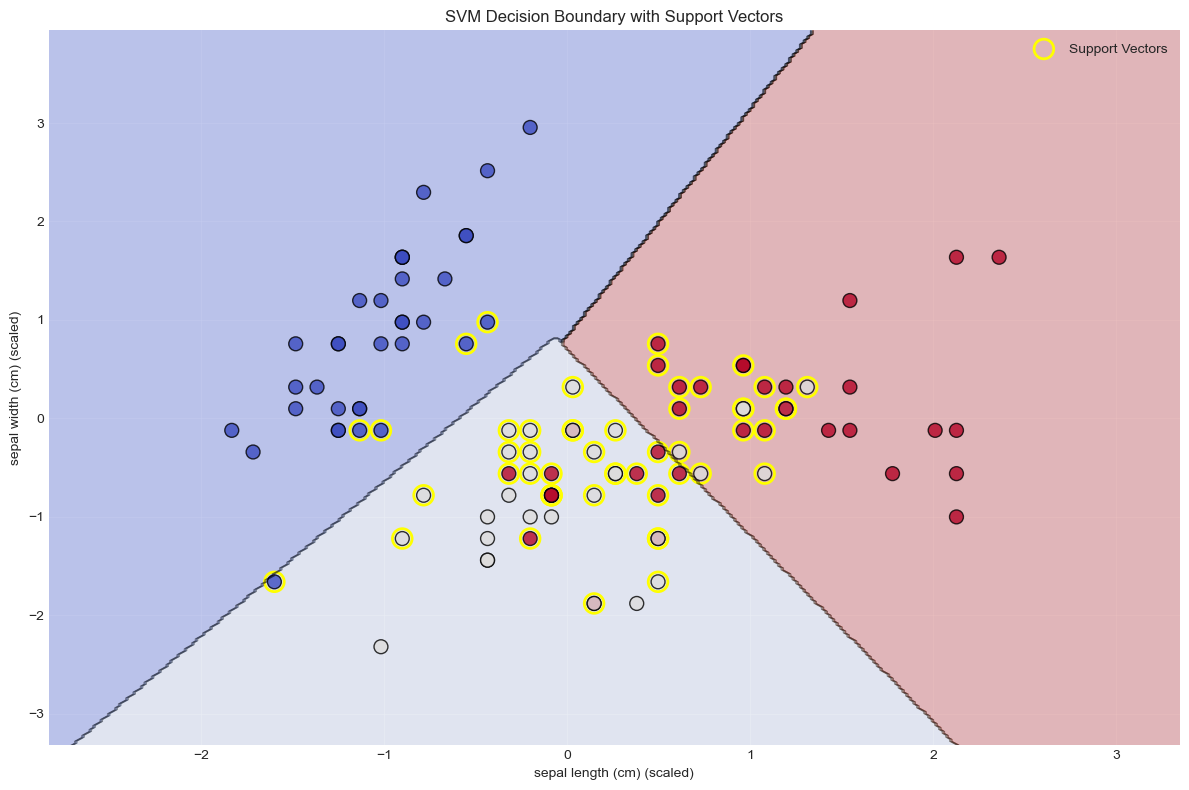

Number of support vectors: 51
Accuracy on 2D data: 0.6889

2D DECISION BOUNDARY VISUALIZATION (Petal Features)


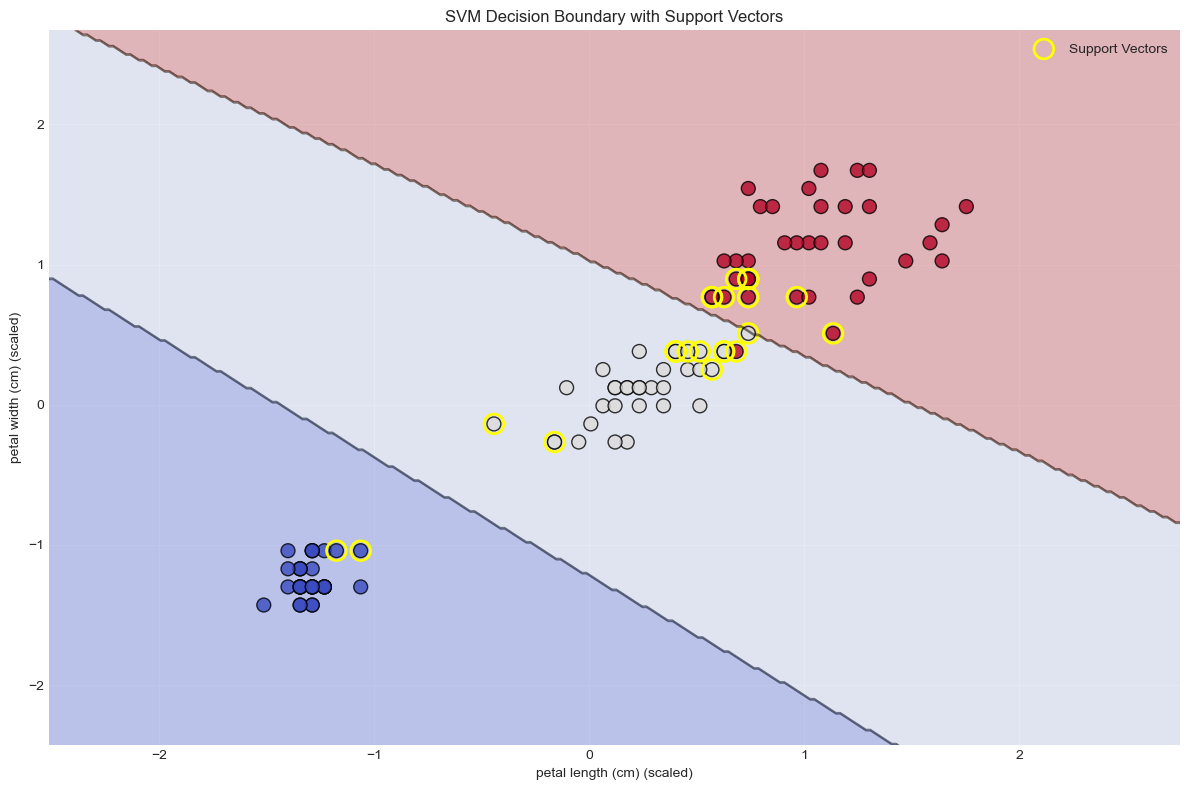

Number of support vectors: 22
Accuracy on 2D data: 0.9111


In [12]:
class SVMAnalyzer:
    """
    A comprehensive SVM analyzer for classification tasks
    """
    
    def __init__(self, X, y):
        """
        Initialize the SVM analyzer
        
        Parameters:
        X: Feature matrix
        y: Target vector
        """
        self.X = X
        self.y = y
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.models = {}
        self.results = {}
        
    def prepare_data(self, test_size=0.3, random_state=42):
        """
        Split and scale the data
        
        Parameters:
        test_size: Proportion of test data
        random_state: Random seed for reproducibility
        """
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state, stratify=self.y
        )
        
        # Scale the features (important for SVM)
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        self.X_train = X_train_scaled
        self.X_test = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        
        print(f"Training set size: {len(X_train)} samples")
        print(f"Test set size: {len(X_test)} samples")
        
    def train_models(self):
        """
        Train multiple SVM models with different kernels
        """
        # Define different kernels to compare
        kernels = {
            'linear': {'kernel': 'linear'},
            'poly': {'kernel': 'poly', 'degree': 3},
            'rbf': {'kernel': 'rbf', 'gamma': 'scale'},
            'sigmoid': {'kernel': 'sigmoid'}
        }
        
        print("\nTraining SVM models with different kernels:")
        print("-" * 50)
        
        for name, params in kernels.items():
            print(f"\nTraining {name.upper()} kernel SVM...")
            
            # Create and train the model
            svm_model = SVC(C=1.0, **params, random_state=42)
            svm_model.fit(self.X_train, self.y_train)
            
            # Make predictions
            y_pred = svm_model.predict(self.X_test)
            
            # Calculate accuracy
            accuracy = accuracy_score(self.y_test, y_pred)
            
            # Store model and results
            self.models[name] = svm_model
            self.results[name] = {
                'model': svm_model,
                'predictions': y_pred,
                'accuracy': accuracy
            }
            
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  Number of support vectors: {sum(svm_model.n_support_)}")
    
    def hyperparameter_tuning(self):
        """
        Perform hyperparameter tuning using GridSearchCV
        """
        print("\n\nHyperparameter Tuning for RBF Kernel:")
        print("-" * 50)
        
        # Define parameter grid for RBF kernel
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.1, 1, 10]
        }
        
        # Create and train the grid search
        grid_search = GridSearchCV(
            SVC(kernel='rbf', random_state=42),
            param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(self.X_train, self.y_train)
        
        # Get the best model
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        y_pred = best_model.predict(self.X_test)
        # Evaluate on test set
        test_score = best_model.score(self.X_test, self.y_test)

        print(f"\nBest parameters: {best_params}")
        print(f"Best cross-validation score: {best_score:.4f}")
        print(f"Test set accuracy: {test_score:.4f}")
        
        self.models['tuned_rbf'] = best_model
        self.results['tuned_rbf'] = {
            'model': best_model,
            'params': best_params,
            'cv_score': best_score,
            'test_accuracy': test_score,
            'predictions': y_pred
        }
    
    def evaluate_models(self):
        """
        Evaluate and compare all trained models
        """
        print("\n\nModel Comparison:")
        print("-" * 50)
        
        # Create comparison table
        comparison_data = []
        for name, result in self.results.items():
            if 'accuracy' in result:
                comparison_data.append([name, result['accuracy']])
            elif 'test_accuracy' in result:
                comparison_data.append([name, result['test_accuracy']])
        
        comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'Accuracy'])
        comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
        
        print(comparison_df.to_string(index=False))
        
        # Visualize the comparison
        plt.figure(figsize=(10, 6))
        bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
                      color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet'])
        plt.xlabel('SVM Kernel Type')
        plt.ylabel('Accuracy')
        plt.title('SVM Model Comparison (Accuracy on Test Set)')
        plt.ylim([0.8, 1.0])
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{height:.3f}', ha='center', va='bottom')
        
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def visualize_decision_boundary(self, feature_indices=[0, 1]):
        """
        Visualize decision boundaries for 2D feature space
        
        Parameters:
        feature_indices: Indices of features to visualize (max 2 features)
        """
        if len(feature_indices) != 2:
            print("Please provide exactly 2 feature indices for 2D visualization")
            return
        
        # Select only 2 features for visualization
        X_2d = self.X[:, feature_indices]
        feature_names = iris.feature_names
        
        # Split and scale the 2D data
        X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
            X_2d, self.y, test_size=0.3, random_state=42, stratify=self.y
        )
        
        scaler_2d = StandardScaler()
        X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
        X_test_2d_scaled = scaler_2d.transform(X_test_2d)
        
        # Train a linear SVM on 2D data
        svm_2d = SVC(kernel='linear', C=1.0, random_state=42)
        svm_2d.fit(X_train_2d_scaled, y_train_2d)
        
        # Create mesh grid for visualization
        x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
        y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min, y_max, 0.02))
        
        # Predict for each point in mesh grid
        Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Create the plot
        plt.figure(figsize=(12, 8))
        
        # Plot decision boundary and regions
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.contour(xx, yy, Z, colors='k', linewidths=0.5, alpha=0.5)
        
        # Plot training points
        scatter = plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], 
                            c=y_train_2d, cmap=plt.cm.coolwarm, 
                            edgecolors='k', s=100, alpha=0.8)
        
        # Highlight support vectors
        plt.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1],
                   s=200, facecolors='none', edgecolors='yellow', 
                   linewidths=2, label='Support Vectors')
        
        plt.xlabel(f'{feature_names[feature_indices[0]]} (scaled)')
        plt.ylabel(f'{feature_names[feature_indices[1]]} (scaled)')
        plt.title('SVM Decision Boundary with Support Vectors')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"Number of support vectors: {len(svm_2d.support_vectors_)}")
        print(f"Accuracy on 2D data: {svm_2d.score(X_test_2d_scaled, y_test_2d):.4f}")
    
    def detailed_classification_report(self, model_name='rbf'):
        """
        Generate detailed classification report for a specific model
        
        Parameters:
        model_name: Name of the model to evaluate
        """
        if model_name not in self.results:
            print(f"Model '{model_name}' not found!")
            return
        
        model_info = self.results[model_name]
        y_pred = model_info['predictions']
        
        print(f"\nDetailed Classification Report for {model_name.upper()} Kernel:")
        print("-" * 60)
        
        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=iris.target_names,
                   yticklabels=iris.target_names)
        plt.title(f'Confusion Matrix - {model_name.upper()} Kernel')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()
        
        # Classification Report
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred, 
                                   target_names=iris.target_names))

# Main execution
def main():
    """
    Main function to demonstrate SVM on Iris dataset
    """
    print("=" * 70)
    print("SUPPORT VECTOR MACHINES (SVM) DEMONSTRATION")
    print("Dataset: Iris Flower Classification")
    print("=" * 70)
    
    # Prepare the data (using all 4 features for main analysis)
    X = iris.data
    y = iris.target
    
    # Create and run the SVM analyzer
    analyzer = SVMAnalyzer(X, y)
    analyzer.prepare_data()
    analyzer.train_models()
    analyzer.hyperparameter_tuning()
    analyzer.evaluate_models()
    
    # Generate detailed report for the best model
    analyzer.detailed_classification_report('tuned_rbf')
    
    # Visualize decision boundary for 2 features (sepal length and width)
    print("\n" + "=" * 70)
    print("2D DECISION BOUNDARY VISUALIZATION")
    print("=" * 70)
    analyzer.visualize_decision_boundary(feature_indices=[0, 1])  # Sepal features
    
    # Additional visualization for petal features
    print("\n" + "=" * 70)
    print("2D DECISION BOUNDARY VISUALIZATION (Petal Features)")
    print("=" * 70)
    analyzer.visualize_decision_boundary(feature_indices=[2, 3])  # Petal features

# Run the main function
if __name__ == "__main__":
    main()